In [10]:
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style('grade3')

In [11]:
path = './Eva/clear3-malicious1_Ditto_avg_acc_test_mnist.txt'
acc = np.loadtxt(path)

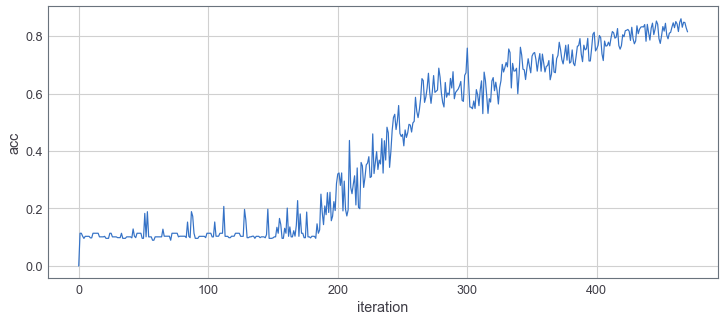

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(acc)), acc)
plt.xlabel('iteration')
plt.ylabel('acc')
plt.show()